In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files

input = pd.read_csv("exp_noise_doe_experiments_input.csv", index_col=0)
output = pd.read_csv("exp_noise_doe_experiments_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)
mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

In [3]:
mf_rbf_gpr_results

,method,noise_std,num_hf,num_lf,problem,seed,mkg_normalized_mae,mkg_normalized_rmse,mkg_r2,mkg_mean_log_likelihood,...,hk_inference_time,hk_learned_noise_std,sk_normalized_mae,sk_normalized_rmse,sk_r2,sk_mean_log_likelihood,sk_lf_training_time,sk_hf_training_time,sk_inference_time,sk_learned_noise_std
0,cokriging,0.3,20,50,mf_Bohachevsky,1,0.124917,0.021891,0.998840,-0.982431,...,0.018671,0.657677,0.154990,0.028307,0.998060,-1.204103,3.671167,1.171883,0.026637,0.714895
1,scaled_kriging,0.3,20,100,mf_Bohachevsky,1,0.156730,0.024119,0.998592,-1.074427,...,0.021216,0.692652,0.177018,0.027320,0.998193,-1.214887,6.792034,1.083749,0.038840,0.758591
2,hk,0.3,20,150,mf_Bohachevsky,1,0.133582,0.024916,0.998497,-0.997718,...,0.020782,0.669498,0.155164,0.027477,0.998172,-1.176430,12.254497,1.191778,0.046711,0.711143
3,mf_rbf_gpr,0.3,20,200,mf_Bohachevsky,1,0.130220,0.021813,0.998848,-1.008265,...,0.024711,0.669090,0.161659,0.028047,0.998096,-1.184867,21.002390,1.104895,0.061508,0.725343
4,scaled_kriging,0.3,20,250,mf_Bohachevsky,1,0.122635,0.020268,0.999006,-0.942328,...,0.032203,0.643004,0.137658,0.024179,0.998585,-1.120364,31.977368,1.131603,0.088770,0.670790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,cokriging,0.3,20,100,mf_Sixhump,5,0.910655,0.093840,0.995299,-1.167984,...,0.019919,0.695841,0.553305,0.095268,0.995155,-1.165580,6.213023,1.139841,0.048047,0.515325
296,scaled_kriging,0.3,20,150,mf_Sixhump,5,0.951140,0.112339,0.993263,-1.071704,...,0.016783,0.572771,0.567058,0.087496,0.995913,-1.091948,10.231925,1.041305,0.041262,0.470997
297,scaled_kriging,0.3,20,200,mf_Sixhump,5,0.829980,0.095896,0.995091,-1.175930,...,0.019051,0.545318,0.533030,0.090928,0.995586,-1.129878,15.433741,1.085202,0.052670,0.446956
298,hk,0.3,20,250,mf_Sixhump,5,0.875188,0.084706,0.996170,-1.028831,...,0.022650,0.545819,0.562652,0.091721,0.995509,-1.112091,26.427936,1.011719,0.067893,0.451407


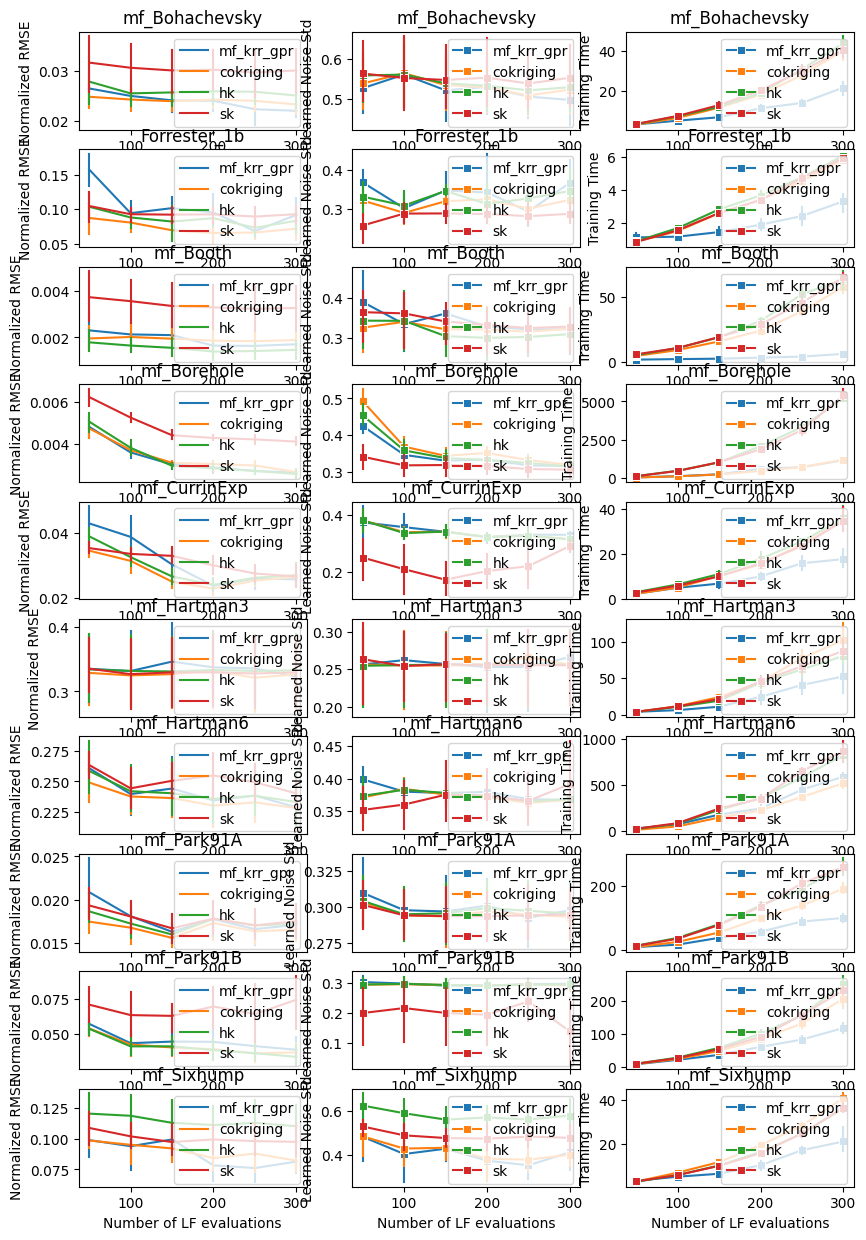

In [7]:
# plot the results of the mf_rbf_lf_200 and gpr_rbf_booth experiments using number of evaluations as x and normalized rmse and log likelihood as y

problems = mf_rbf_gpr_results["problem"].unique()
fig, ax = plt.subplots(10, 3, figsize=(10, 15))
for ii, problem in enumerate(problems):

    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="mkg_normalized_rmse",
        err_style="bars",
        ax=ax[ii, 0],
        label="mf_krr_gpr",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="ck_normalized_rmse",
        ax=ax[ii, 0],
        label="cokriging",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="hk_normalized_rmse",
        ax=ax[ii, 0],
        label="hk",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="sk_normalized_rmse",
        err_style="bars",
        ax=ax[ii, 0],
        label="sk",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="mkg_learned_noise_std",
        marker="s",
        legend="full",
        ax=ax[ii, 1],
        label="mf_krr_gpr",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="ck_learned_noise_std",
        marker="s",
        legend="full",
        ax=ax[ii, 1],
        label="cokriging",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="hk_learned_noise_std",
        marker="s",
        legend="full",
        ax=ax[ii, 1],
        label="hk",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="sk_learned_noise_std",
        marker="s",
        legend="full",
        ax=ax[ii, 1],
        label="sk",
        err_style="bars",
    )
# plot the lf training time
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="mkg_lf_training_time",
        marker="s",
        legend="full",
        ax=ax[ii, 2],
        label="mf_krr_gpr",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="ck_lf_training_time",
        marker="s",
        legend="full",
        ax=ax[ii, 2],
        label="cokriging",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="hk_lf_training_time",
        marker="s",
        legend="full",
        ax=ax[ii, 2],
        label="hk",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_lf",
        y="sk_lf_training_time",
        marker="s",
        legend="full",
        ax=ax[ii, 2],
        label="sk",
        err_style="bars",
    )

    ax[ii, 0].set_title(problem)
    ax[ii, 0].set_ylabel("Normalized RMSE")
    ax[ii, 0].set_xlabel("Number of LF evaluations")
    ax[ii, 1].set_title(problem)
    ax[ii, 1].set_ylabel("Learned Noise Std")
    ax[ii, 1].set_xlabel("Number of LF evaluations")
    ax[ii, 2].set_title(problem)
    ax[ii, 2].set_ylabel("Training Time")
    ax[ii, 2].set_xlabel("Number of LF evaluations")
    ax[ii, 0].legend(loc="upper right")
    ax[ii, 1].legend(loc="upper right")
    ax[ii, 2].legend(loc="upper right")

ValueError: Could not interpret value `mf_normalized_rmse` for `y`. An entry with this name does not appear in `data`.

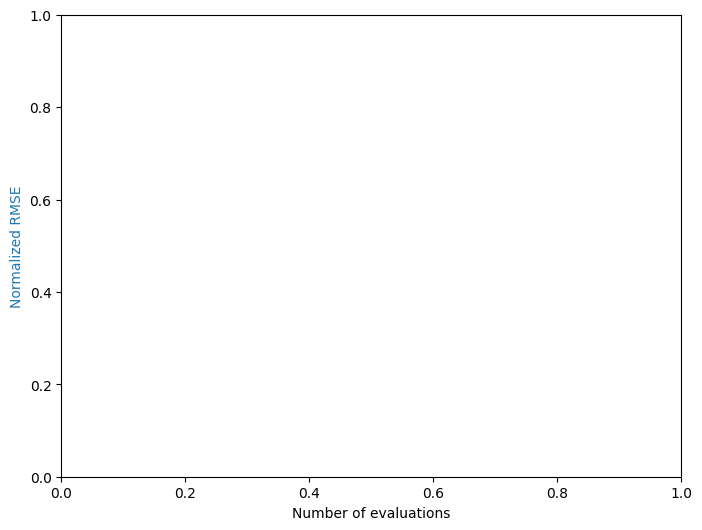

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized RMSE on the left y-axis
color = "tab:blue"
ax1.set_xlabel("Number of evaluations")
ax1.set_ylabel("Normalized RMSE", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    palette="colorblind",
    marker="^",
    legend="full",
    linewidth=2,
    y="mf_normalized_rmse",
    hue="noise_std",
    ax=ax1,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_normalized_rmse",
    ax=ax1,
)
ax1.tick_params(axis="y", labelcolor=color)

ax1.get_legend().remove()

# Create another y-axis for log likelihood
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Log Likelihood", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="^",
    legend="full",
    y="mf_mean_log_likelihood",
    ax=ax2,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_mean_log_likelihood",
    ax=ax2,
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.get_legend().remove()
# set the legend scale of the right y-axis into log scale
# ax2.set_yscale('log')

# add legend

plt.show()

In [ ]:
# problem information
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

# # set r2 to have 3 decimal places
# r2 = [round(i, 3) for i in r2]
# print(r2)

In [ ]:
problem_set = mf_rbf_gpr_results["problem"].unique()

font_size = 14
fig, ax = plt.subplots(3, 3, figsize=(16, 9))
# for problem in problem_set:

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        result = mf_rbf_gpr_results[(mf_rbf_gpr_results["problem"] == problem)]
        # Plot normalized RMSE on the left y-axis
        color = "tab:blue"
        if ii == 2:
            ax[ii, jj].set_xlabel(
                "number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE", color=color)
        else:
            ax[ii, jj].set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_normalized_rmse",
            hue="noise_std",
            ax=ax[ii, jj],
            err_style="bars",
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linewidth=2,
            linestyle="dashed",
            y="sf_normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
        )
        ax[ii, jj].tick_params(axis="y", labelcolor=color)
        ax[ii, jj].get_legend().remove()
        # Create another y-axis for log likelihood
        ax2 = ax[ii, jj].twinx()
        color = "tab:red"
        if jj == 2:
            ax2.set_ylabel("Log Likelihood", color=color, fontsize=font_size)
        else:
            ax2.set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_mean_log_likelihood",
            err_style="bars",
            ax=ax2,
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linestyle="dashed",
            linewidth=2,
            err_style="bars",
            y="sf_mean_log_likelihood",
            ax=ax2,
        )
        ax2.tick_params(axis="y", labelcolor=color)
        # remove the legend of ax2
        if ii == 2 and jj == 2:
            ax2.legend(fontsize=12)
        else:
            ax2.get_legend().remove()

        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=font_size)
        ax2.tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)
        ax2.spines["right"].set_linewidth(1.5)
        # get title info
        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title)
        # set space between subplots
        plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.savefig("gpr_comparison_at_200lf_samples.png",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.svg",
            dpi=300, bbox_inches="tight")
plt.show()